In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from pandas.plotting import andrews_curves
import pylab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Constraint on cost, maximize accuracy

In [7]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_pareto(m_dist):
    filepath = 'repository/pareto_only_model_'+m_dist+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

filepath = 'repository/pareto_only_model_uniform.csv'
df_pareto =  pd.read_csv(filepath,index_col=0)

filepath = 'repository/model_repository_uniform.csv'
df_uni =  pd.read_csv(filepath,index_col=0)
tasks = ['T'+str(idx) for idx in range(len(df_uni.columns)-1)]
df_uni.columns = tasks+['cost']
print('len of df is: '+str(len(df_uni.columns)))

models = ['M'+str(idx) for idx in range(len(df_uni.index))]
df_uni.index = models

len of df is: 1922


In [8]:
df_uni.head()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T1912,T1913,T1914,T1915,T1916,T1917,T1918,T1919,T1920,cost
M0,0.775475,0.609524,0.710345,0.684211,0.668449,0.753138,0.641593,0.527687,0.632035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
M1,0.709911,0.537037,0.583053,0.607407,0.750000,0.645455,0.731579,0.486607,0.561224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
M2,0.936210,0.901786,0.875616,0.899497,0.938596,0.882051,0.912409,0.790698,0.918182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
M3,0.954582,0.930851,0.907407,0.944238,0.975610,0.934211,0.973856,0.844221,0.920000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
M4,0.830052,0.731915,0.761962,0.841216,0.871622,0.825397,0.827027,0.585799,0.708215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0


(3, 2)
(323, 2)


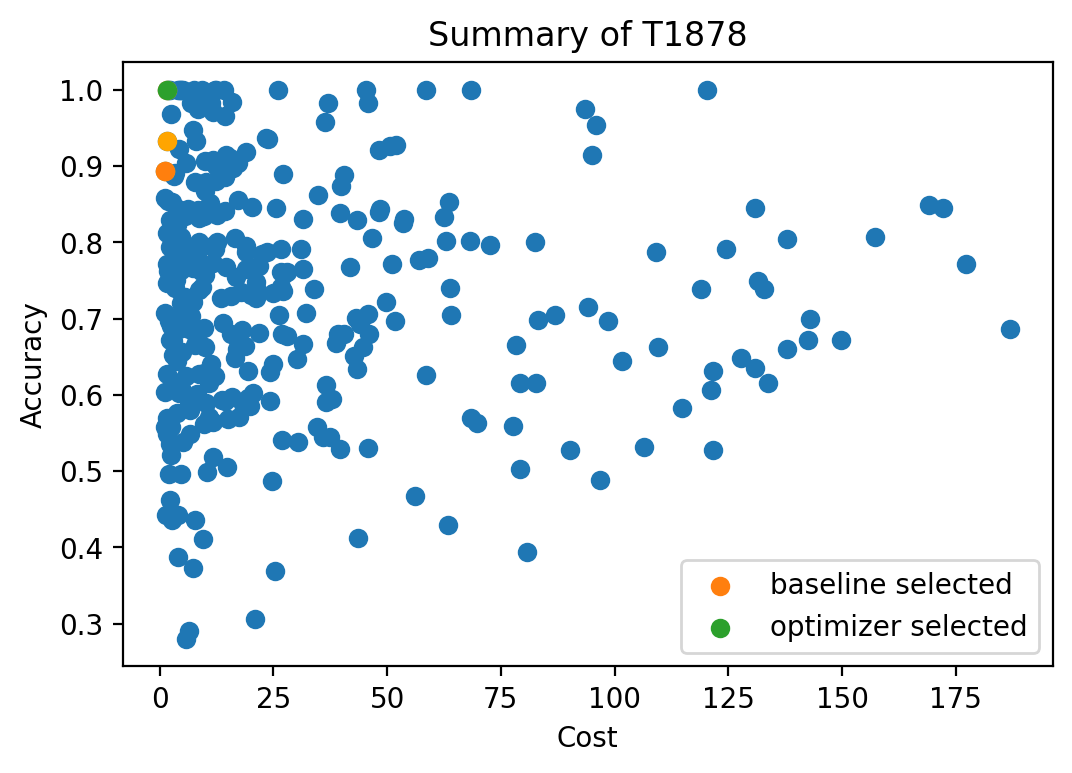

(4, 2)
(294, 2)


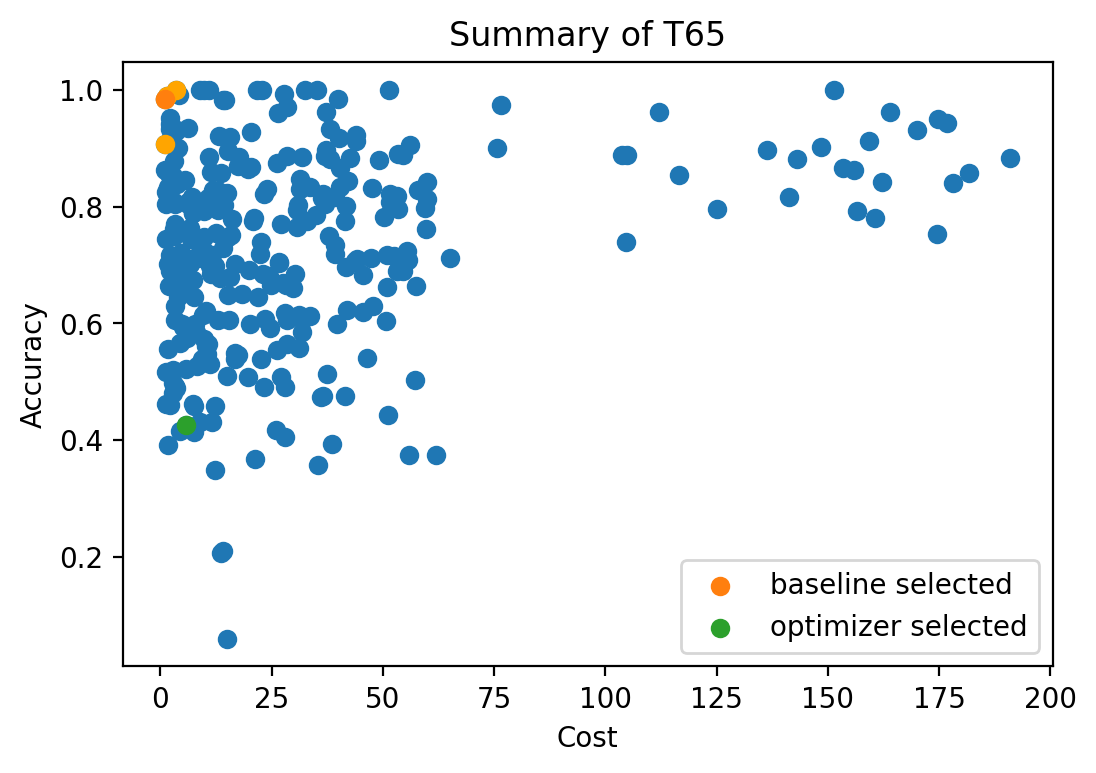

In [15]:
plt.rcParams['figure.dpi'] = 200
def plot(df,df_uni,T,opt_m,base_m):
    for i, t in enumerate(T):
        data = df_pareto.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        print(data.shape)

        data_uni = df_uni.loc[:,[t,'cost']]
        data_uni.dropna(inplace=True)
        print(data_uni.shape)

        fig, ax = plt.subplots()
        ax.scatter(df_uni['cost'], df_uni[t])
        ax.scatter(df['cost'], df[t],c='orange')
        #baseline selected
        ax.scatter(df.loc[base_m[i],'cost'], df.loc[base_m[i],t],label='baseline selected')
        # optimizer selected
        ax.scatter(df_uni.loc[opt_m[i],'cost'], df_uni.loc[opt_m[i],t],label='optimizer selected')
        
        plt.title('Summary of '+t)
        plt.xlabel('Cost')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
    
#T1878.M1094|T65.M189
plot(df_pareto,df_uni,['T1878','T65'],['M869','M1276'],['M1094','M189'])

(6, 2)
(303, 2)


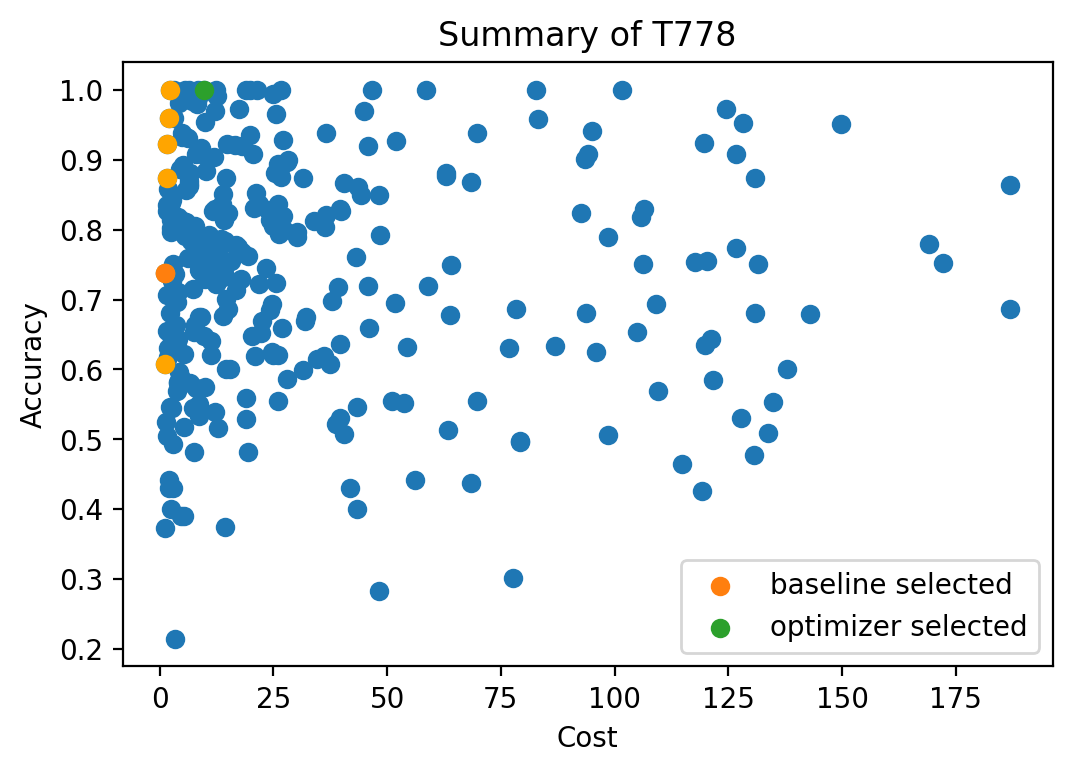

(5, 2)
(312, 2)


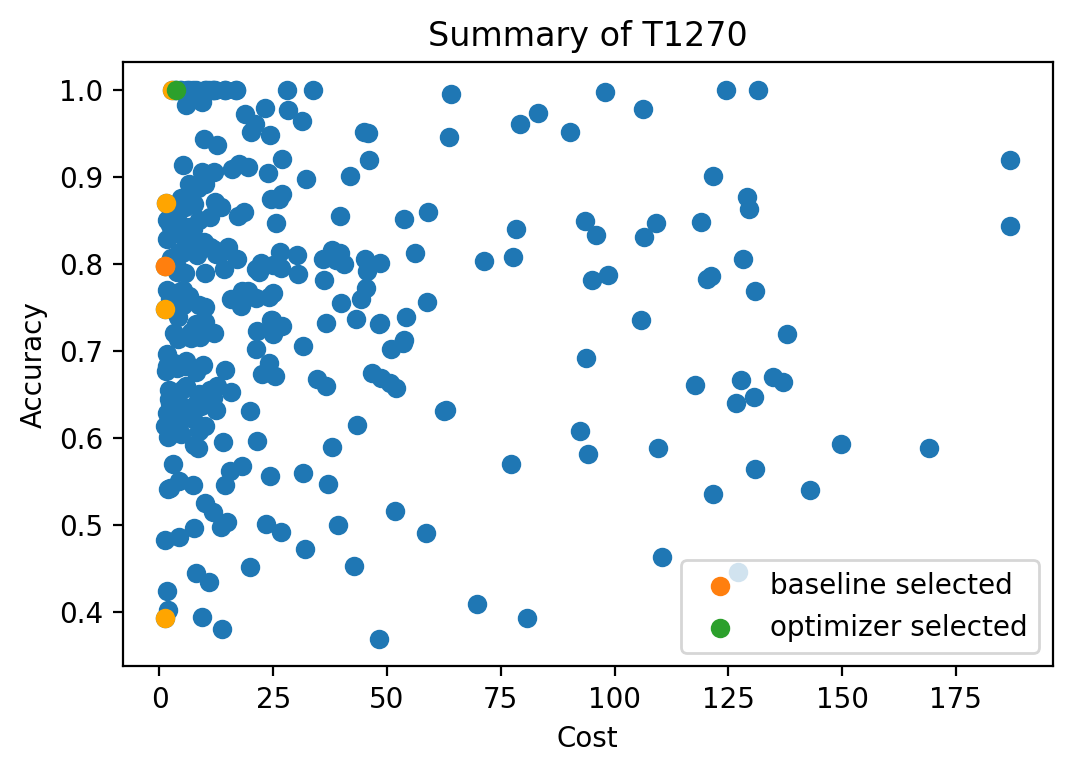

In [17]:
# T778.M762&T1270.M1100
# T778.M1169|T1270.M1135
plot(df_pareto,df_uni,['T778','T1270'],['M762','M1100'],['M1169','M1135'])

In [2]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_cost(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_cost(m,q,app))
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
['baseline_pareto_uniform_uniform', 'optimizer_uniform_uniform', 'baseline_pareto_power_law_uniform', 'optimizer_power_law_uniform', 'baseline_pareto_uniform_power_law', 'optimizer_uniform_power_law', 'baseline_pareto_power_law_power_law', 'optimizer_power_law_power_law']


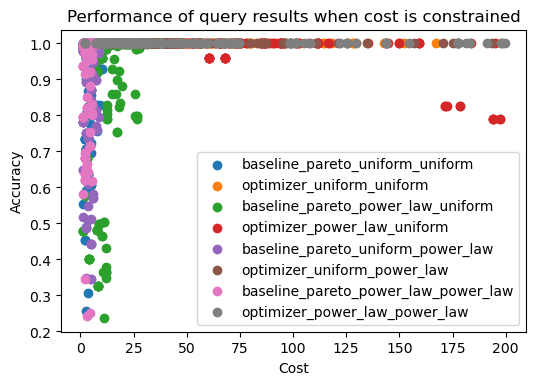

In [200]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
plt.title('Performance of query results when cost is constrained')
plt.legend()

In [201]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_cost(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_cost(m,q,app))
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
['baseline_pareto_uniform_uniform', 'optimizer_uniform_uniform', 'baseline_pareto_power_law_uniform', 'optimizer_power_law_uniform', 'baseline_pareto_uniform_power_law', 'optimizer_uniform_power_law', 'baseline_pareto_power_law_power_law', 'optimizer_power_law_power_law']


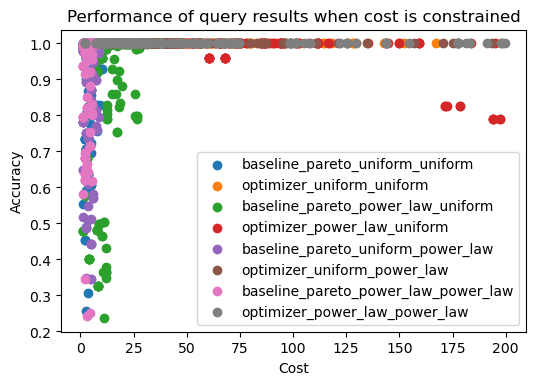

In [202]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
plt.title('Performance of query results when cost is constrained')
# plt.yscale('logit')
plt.legend()

### Boxplot on the objective dimension: accuracy

In [359]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(7, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)

    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 2),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 2
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.461-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
Accuracy of query results when cost is constrained


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


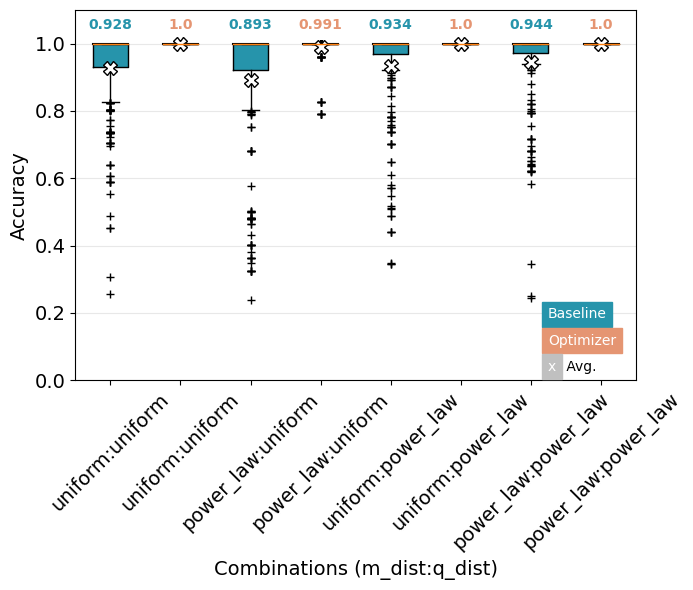

In [360]:
comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['accuracy'])
            i+=1
print(comb_dists)
ylabel='Accuracy'
constraint='cost'
print(ylabel+' of query results when '+constraint+' is constrained')
boxplot(comb_dists,data,max_y=max(data[0]),
        ylabel='Accuracy',constraint='cost',
       path="image/accuacy_vs_approaches_constraint_cost.eps")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']


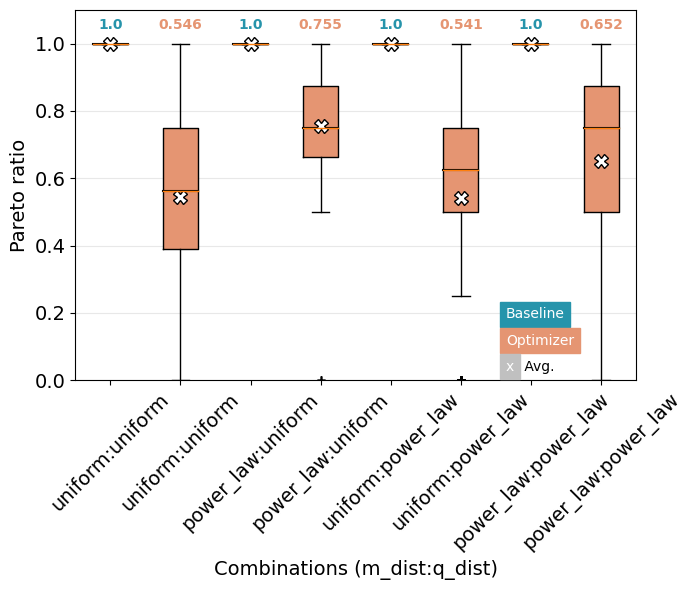

In [361]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

comb_dists = []
data = []
i = 0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='cost', x_offset=0.06,
       path='image/pareto_vs_approaches_constraint_cost.eps')

In [435]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


comb_dists = []
data = []
i=0

for a,app in enumerate(approach):
    for i,m in enumerate(m_dist):
        for j,q in enumerate(q_dist):
            comb_dists.append(app+'-'+m+':'+q)
            data.append(df_list[4*i+2*j+a][['#predicate','optimization_time']])
print(comb_dists)

['baseline_pareto-uniform:uniform', 'baseline_pareto-uniform:power_law', 'baseline_pareto-power_law:uniform', 'baseline_pareto-power_law:power_law', 'optimizer-uniform:uniform', 'optimizer-uniform:power_law', 'optimizer-power_law:uniform', 'optimizer-power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


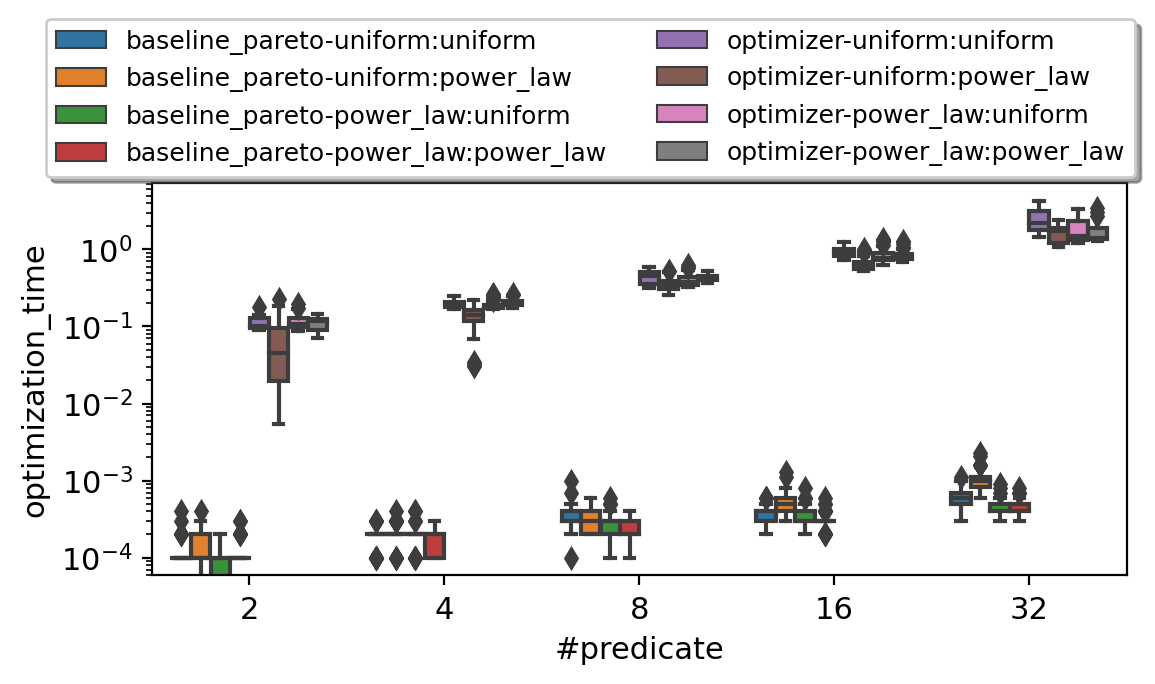

In [436]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
# plt.legend(bbox_to_anchor=(0.9, 0.8))
g.legend(loc='upper center', bbox_to_anchor=(0.45, 1.45),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")
g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_approaches_constraint_cost.eps',format='eps')

In [423]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)

['uniform:uniform', 'uniform:power_law', 'power_law:uniform', 'power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


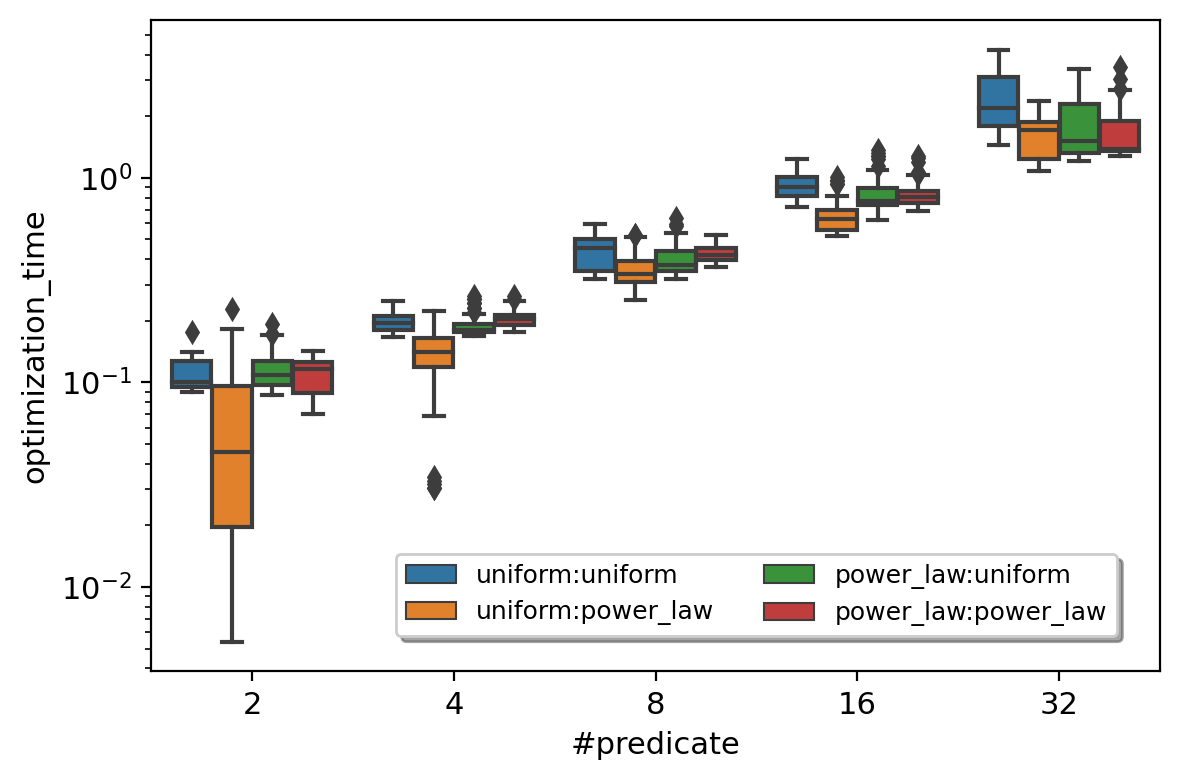

In [433]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_cost.eps',format='eps')

['baseline_pareto', 'optimizer']
(500, 3)
  #predicate         approach  optimization_time
0          2  baseline_pareto             0.0001
1          2  baseline_pareto             0.0002
2          2  baseline_pareto             0.0001
3          2  baseline_pareto             0.0001
4          2  baseline_pareto             0.0001


Text(0.5, 1.0, 'Runtime against #predicate in a query when constrained on cost')

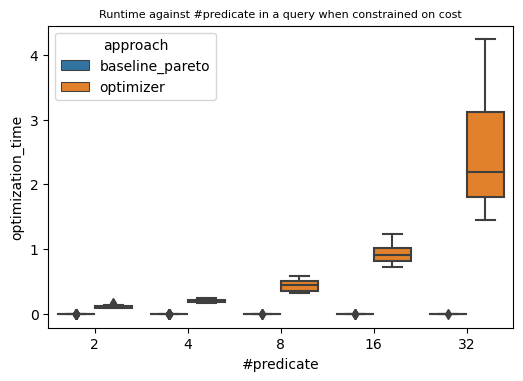

In [206]:
q_dist = ['uniform']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

def load(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        for app in approach:
            comb_dists.append(app)
            data.append(df_list[i][['#predicate','optimization_time']])
            i+=1
print(comb_dists)

plt.rcParams['figure.dpi'] = 100
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)
    
print(df.shape)
print(df.head())
    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
# g.set_yscale("log")

## Constraint on accuracy, minmize cost

In [437]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_accu(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_accu(m,q,app))
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
(250, 17)
['baseline_pareto_uniform_uniform', 'optimizer_uniform_uniform', 'baseline_pareto_power_law_uniform', 'optimizer_power_law_uniform', 'baseline_pareto_uniform_power_law', 'optimizer_uniform_power_law', 'baseline_pareto_power_law_power_law', 'optimizer_power_law_power_law']


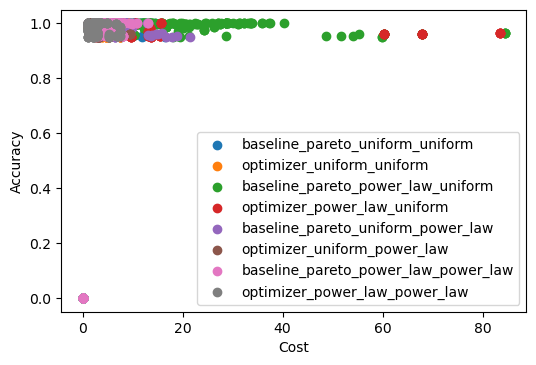

In [408]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
# plt.yscale('logit')
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']


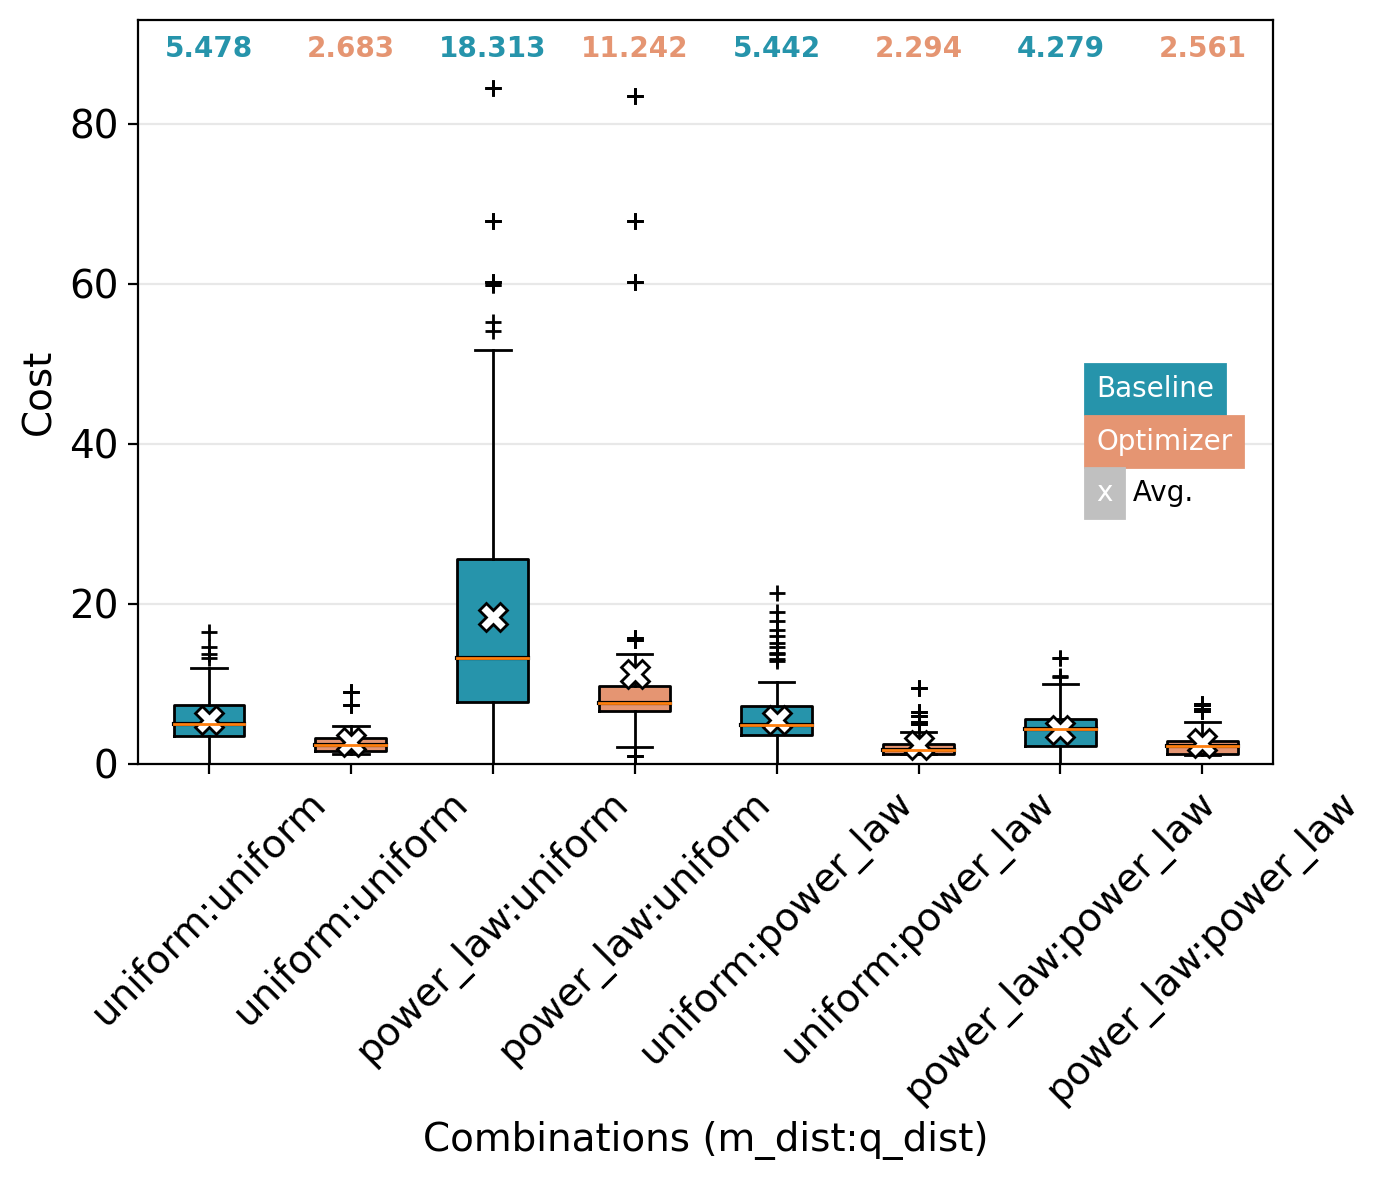

In [438]:

comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['cost'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Cost',constraint='accuracy',
       path='image/cost_vs_approaches_constraint_accu.eps',
       y_offset=-0.2)

## Pareto ratio

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']


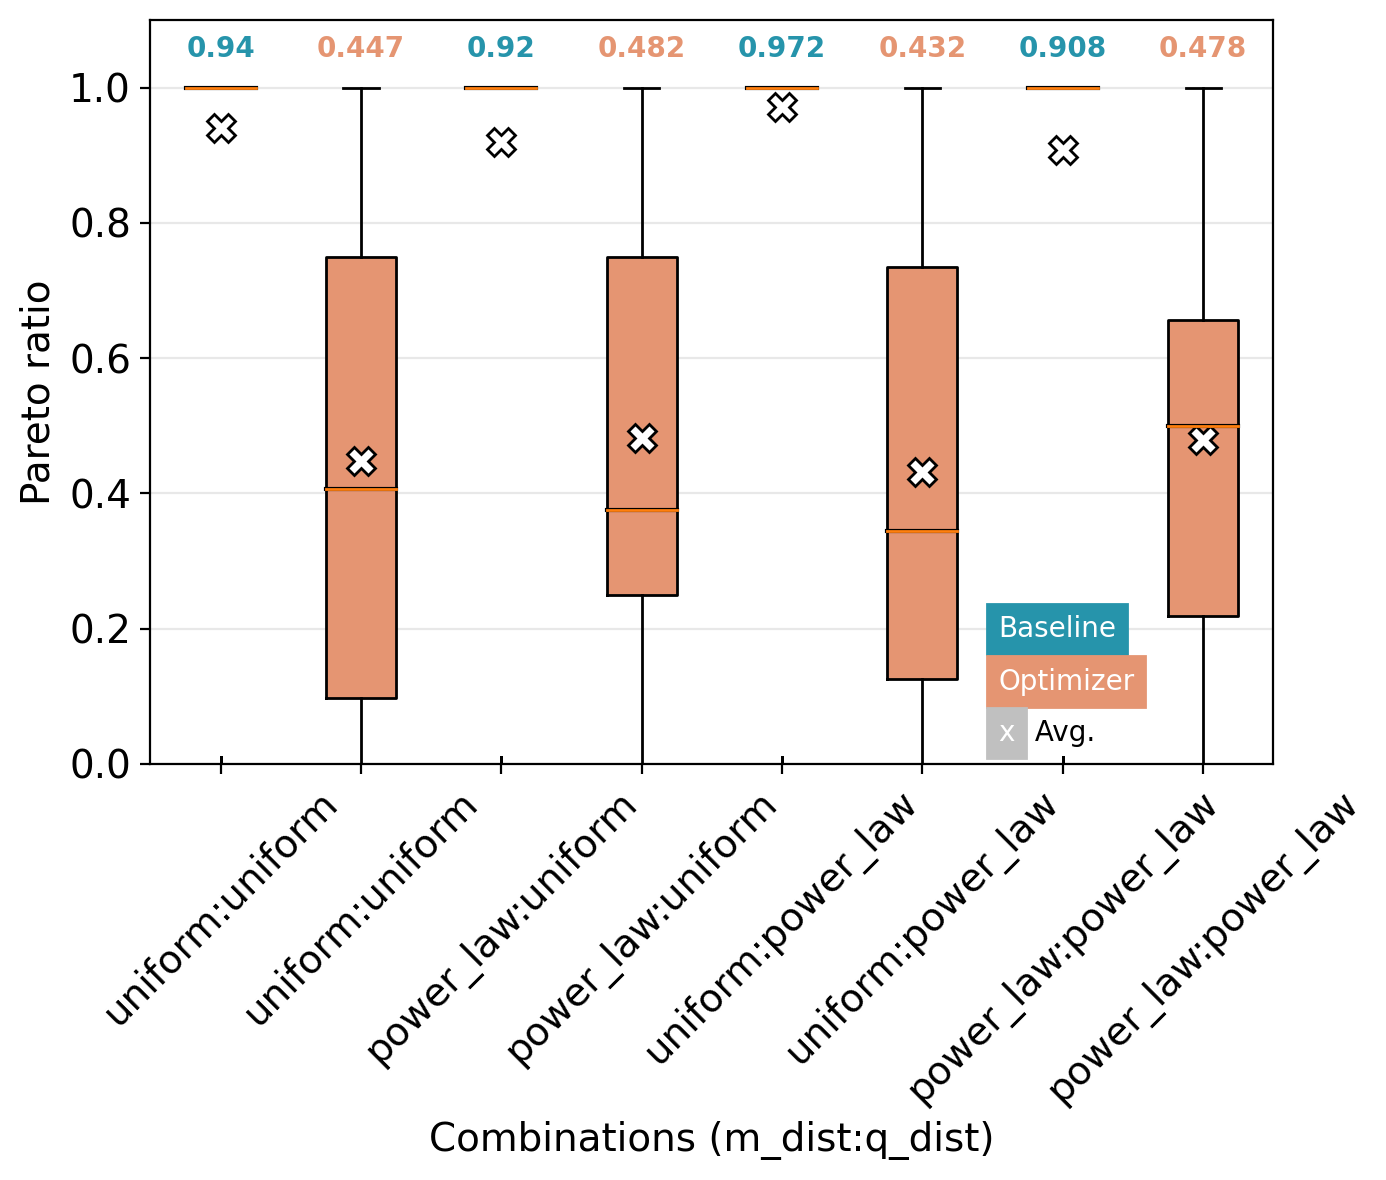

In [439]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='accuracy',
        path='image/pareto_vs_approaches_constraint_accu.eps',
       x_offset=0.07)

### Runtime

In [440]:
q_dist = ['uniform','power_law']
m_dist = q_dist

def load(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)


['uniform:uniform', 'uniform:power_law', 'power_law:uniform', 'power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


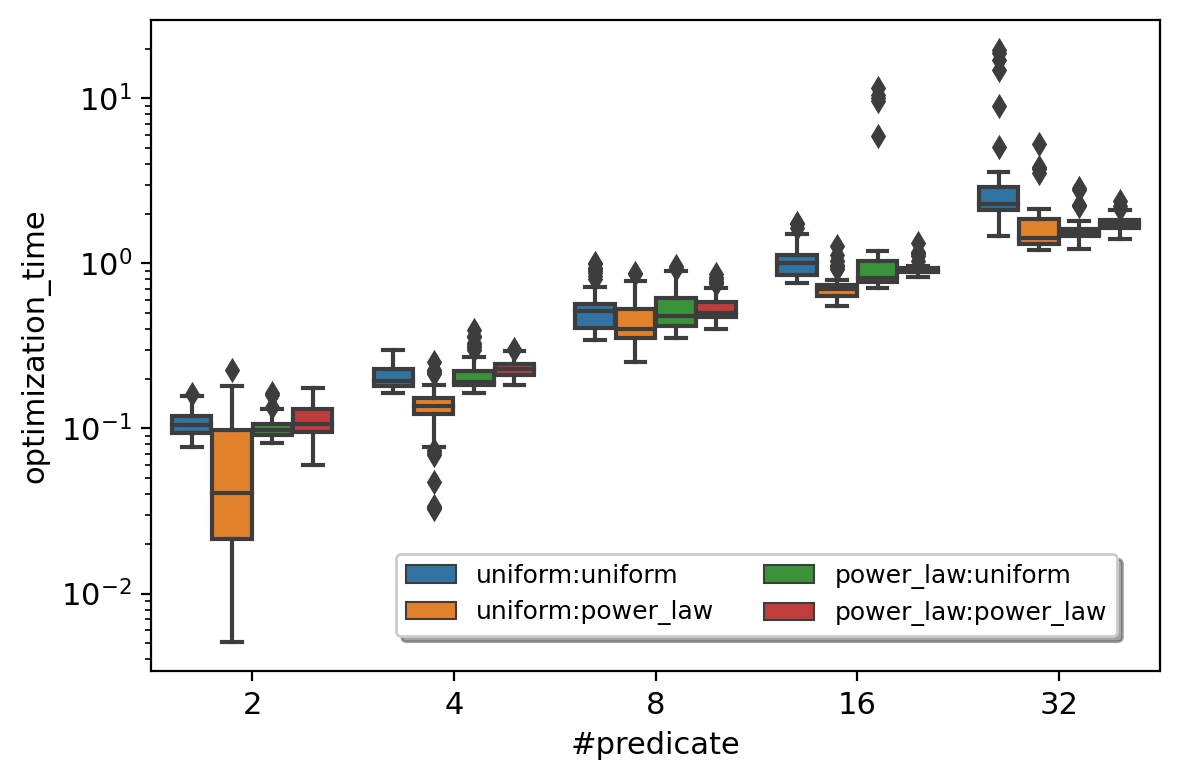

In [443]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on accuarcy",fontsize=8)
g.set_yscale("log")
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_accu.eps',format='eps')

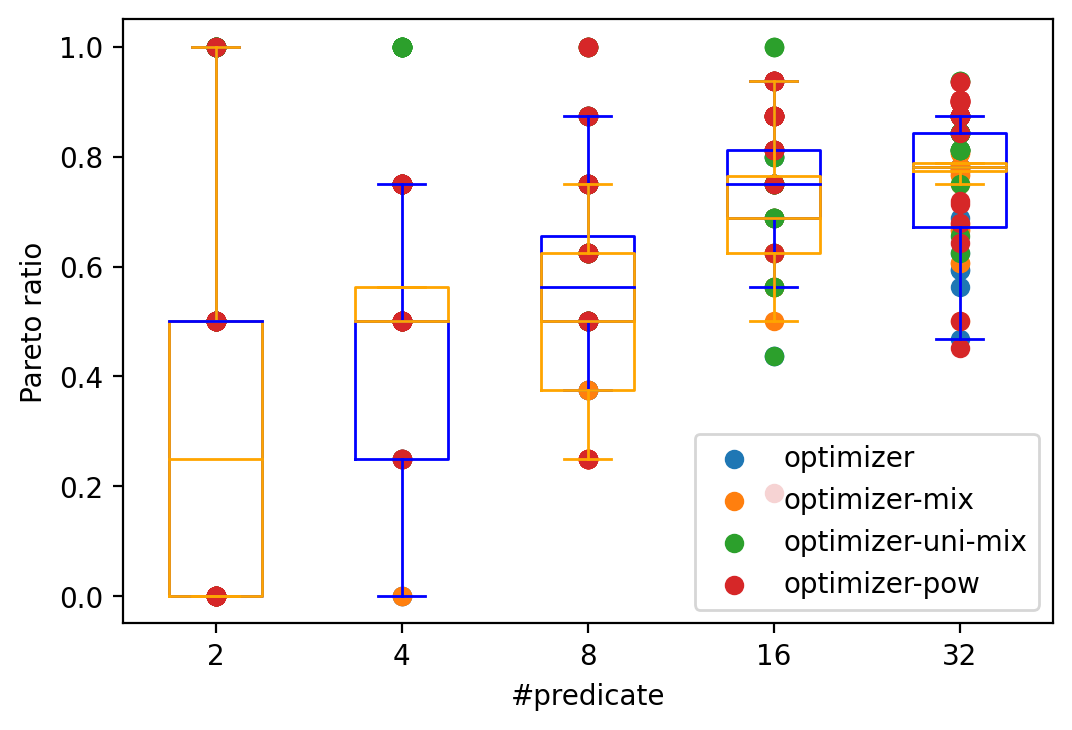

In [55]:
fig, ax = plt.subplots()
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],label='optimizer')
ax.scatter(x_mix_optimizer,mix_optimizer['pareto_ratio'],label='optimizer-mix')
ax.scatter(x_uni_mix_optimizer,uni_mix_optimizer['pareto_ratio'],label='optimizer-uni-mix')
ax.scatter(x_pow_optimizer,pow_optimizer['pareto_ratio'],label='optimizer-pow')

# rectangular box plot
bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([mix_optimizer[mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
    
# bplot1 = ax.boxplot([x_uni_mix_optimizer[x_uni_mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
#                      showfliers=False,
#                      vert=True,  # vertical box alignment
#                      labels=range(5)) 

# c2 = "orange"
# for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(bplot1[item], color=c2)
    
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()

In [ ]:
def boxplot(data,query_range):
    box_colors = ['darkkhaki', 'royalblue']
    fig, ax = plt.subplots()
    ax.set_title('Pareto Ratio')
    bp = ax.boxplot(data)
    plt.xticks(range(1,len(query_range)+1), query_range)
    plt.xlabel("#queries")
    plt.ylabel("Pareto ratio")
    plt.show()

## Runtime

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_baseline, _baseline['runtime'],label='baseline')
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],c='orange',label='optimizer')
# rectangular box plot
bplot1 = ax.boxplot([_baseline[_baseline['#predicate']==k]['pareto_ratio'] for k in key],
                     notch=True,
                     vert=True,  # vertical box alignment
                     showfliers=False,
                     labels=range(5))  # will be used to label x-ticks
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in key],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()